# Generate .csv tables of Calibration steps

# Load Reddening Law

In [4]:
from data.datamapping import R, R123, dis_flag, mag, colors, A
print(R, '\n', A)
for d,dis in enumerate(dis_flag):
    for a,c1 in enumerate(mag):
        for b,c2 in enumerate(mag[a+1:]):
            x = 1
            print([f'{x+c1+c2}: {R123(x,c1,c2) :.3f}' for x in mag])

{'B': 4.1789000000000005, 'V': 3.19, 'I': 1.93952, 'J': 0.9471109999999999, 'H': 0.575795, 'K': 0.392689} 
 {'B': 1.31, 'V': 1.0, 'R': 0.845, 'I': 0.608, 'J': 0.2969, 'H': 0.1805, 'K': 0.1231}
['BBV: 4.226', 'VBV: 3.226', 'IBV: 1.961', 'JBV: 0.958', 'HBV: 0.582', 'KBV: 0.397']
['BBI: 1.866', 'VBI: 1.425', 'IBI: 0.866', 'JBI: 0.423', 'HBI: 0.257', 'KBI: 0.175']
['BBJ: 1.293', 'VBJ: 0.987', 'IBJ: 0.600', 'JBJ: 0.293', 'HBJ: 0.178', 'KBJ: 0.121']
['BBH: 1.160', 'VBH: 0.885', 'IBH: 0.538', 'JBH: 0.263', 'HBH: 0.160', 'KBH: 0.109']
['BBK: 1.104', 'VBK: 0.843', 'IBK: 0.512', 'JBK: 0.250', 'HBK: 0.152', 'KBK: 0.104']
['BVI: 3.342', 'VVI: 2.551', 'IVI: 1.551', 'JVI: 0.757', 'HVI: 0.461', 'KVI: 0.314']
['BVJ: 1.863', 'VVJ: 1.422', 'IVJ: 0.865', 'JVJ: 0.422', 'HVJ: 0.257', 'KVJ: 0.175']
['BVH: 1.599', 'VVH: 1.220', 'IVH: 0.742', 'JVH: 0.362', 'HVH: 0.220', 'KVH: 0.150']
['BVK: 1.494', 'VVK: 1.140', 'IVK: 0.693', 'JVK: 0.339', 'HVK: 0.206', 'KVK: 0.140']
['BIJ: 4.211', 'VIJ: 3.214', 'IIJ: 1.954',

In [2]:
for a,c1 in enumerate(mag):
    for b,c2 in enumerate(mag[a+1:]):
        x=1
        print(f'{mag[0]+c1+c2} & {R123(mag[0],c1,c2)} & {mag[1]+c1+c2} & {R123(mag[1],c1,c2)} & {mag[2]+c1+c2} & {R123(mag[2],c1,c2)} & {mag[3]+c1+c2} & {R123(mag[3],c1,c2)} & {mag[4]+c1+c2} & {R123(mag[4],c1,c2)} & {mag[5]+c1+c2} & {R123(mag[5],c1,c2)} \\\\') 
        #print([f'{x+c1+c2}: {R123(x,c1,c2) :.3f}' for x in mag])

BBV & 4.2258 & VBV & 3.2258 & IBV & 1.9613 & JBV & 0.9577 & HBV & 0.5823 & KBV & 0.3971 \\
BBI & 1.8661 & VBI & 1.4245 & IBI & 0.8661 & JBI & 0.4229 & HBI & 0.2571 & KBI & 0.1754 \\
BBJ & 1.2931 & VBJ & 0.9871 & IBJ & 0.6001 & JBJ & 0.2931 & HBJ & 0.1782 & KBJ & 0.1215 \\
BBH & 1.1598 & VBH & 0.8853 & IBH & 0.5383 & JBH & 0.2629 & HBH & 0.1598 & KBH & 0.109 \\
BBK & 1.1037 & VBK & 0.8425 & IBK & 0.5123 & JBK & 0.2501 & HBK & 0.1521 & KBK & 0.1037 \\
BVI & 3.3418 & VVI & 2.551 & IVI & 1.551 & JVI & 0.7574 & HVI & 0.4605 & KVI & 0.314 \\
BVJ & 1.8632 & VVJ & 1.4223 & IVJ & 0.8647 & JVJ & 0.4223 & HVJ & 0.2567 & KVJ & 0.1751 \\
BVH & 1.5985 & VVH & 1.2203 & IVH & 0.7419 & JVH & 0.3623 & HVH & 0.2203 & KVH & 0.1502 \\
BVK & 1.4939 & VVK & 1.1404 & IVK & 0.6934 & JVK & 0.3386 & HVK & 0.2058 & KVK & 0.1404 \\
BIJ & 4.2109 & VIJ & 3.2144 & IIJ & 1.9544 & JIJ & 0.9544 & HIJ & 0.5802 & KIJ & 0.3957 \\
BIH & 3.0644 & VIH & 2.3392 & IIH & 1.4222 & JIH & 0.6945 & HIH & 0.4222 & KIH & 0.288 \\
BIK 

# Load raw PL slope intercept

In [13]:
import pandas as pd

files = {}
files['0'] = '59_madore_h_3.23_S'
files['1'] = '110_IRSB_plx_j_3.23_S'#'76_IRSB_IJ_HK_3.23'#'94_jesper_3.23'
files['2'] = '20_cluster_cruz_3.23'
files['3'] = '29_LMC_3.4'
files['4'] = '32_SMC_VIJK_2.53'
files['5'] = '103_raw_data_IRSB_3.23'

reg={}
for k in range(5):
    if k ==1:
        reg[str(k)] = pd.read_csv(f'data/processed/{files[str(k)]}/2_PLPW/{files[str(k)][:3]}_regression.csv')
    else:
        reg[str(k)] = pd.read_csv(f'data/processed/{files[str(k)]}/2_PLPW/{files[str(k)][:2]}_regression.csv')

In [36]:
mag = ['B', 'V', 'I','J','H','K']
#mag = ['V', 'I','J','K']
k=1
#print(files[str(k)])
data = reg[str(k)]
#
slp, esl, intr, ierr = [], [], [], []

for m in mag:
    slp.append(round(data[f'{m}0'].iloc[0], 3))
    esl.append(round(data[f'{m}0'].iloc[2], 3))
    intr.append(round(data[f'{m}0'].iloc[1], 3))
    ierr.append(round(data[f'{m}0'].iloc[3], 3))

print(
    f'Slope & {slp[0]} ({esl[0]:.3f}) & {slp[1]:.2f} ({esl[1]:.3f}) '
    f'& {slp[2]:.2f} ({esl[2]:.3f}) & {slp[3]:.2f} ({esl[3]:.3f}) '
    f'& {slp[4]:.2f} ({esl[4]:.3f}) & {slp[5]:.2f} ({esl[5]:.3f}) \\\\'
)

print(
    f'Intercept & {intr[0]} ({ierr[0]:.3f}) & {intr[1]:.2f} ({ierr[1]:.3f}) '
    f'& {intr[2]:.2f} ({ierr[2]:.3f}) & {intr[3]:.2f} ({ierr[3]:.3f}) '
    f'& {intr[4]:.2f} ({ierr[4]:.3f}) & {intr[5]:.2f} ({ierr[5]:.3f}) \\\\'
)

    #print(f'{m} & {sl:.2f} ({serr:.2f}) & {intr:.2f} ({ierr:.2f})\\\\')
    #print(f'{m} = ({sl:.3f} \pm {serr:.3f}) (\log P -1) + {intr:.3f} \pm {ierr:.3f} \\\\')
#print(f'Slope & {slp[0]} ({esl[0]:.3f}) & {slp[1]:.2f} ({esl[1]:.3f}) & {slp[2]:.2f} ({esl[2]:.3f}) & {slp[3]:.2f} ({esl[3]:.3f}) & {slp[4]:.2f} ({esl[4]:.3f}) & {slp[5]:.2f} ({esl[5]:.3f})')
    #print(f'{col} & {slp[0]:.2f} ({esl[0]:.3f}) & {slp[1]:.2f} ({esl[1]:.3f}) & {slp[2]:.2f} ({esl[2]:.3f}) & {slp[3]:.2f} ({esl[3]:.3f}) & {slp[4]:.2f} ({esl[4]:.3f}) & {slp[5]:.2f} ({esl[5]:.3f}) \\\\')
#data['B0']

Slope & -2.231 (0.161) & -2.68 (0.156) & -3.01 (0.151) & -3.26 (0.149) & -3.42 (0.148) & -3.47 (0.148) \\
Intercept & -3.151 (0.042) & -3.96 (0.041) & -4.74 (0.039) & -5.22 (0.039) & -5.60 (0.039) & -5.66 (0.039) \\


In [ ]:
'''
slp = r[[f'{m}0' for m in mag]].iloc[0]
print(f'Slope & {slp[0]:.2f} ({esl[0]:.3f}) & {slp[1]:.2f} ({esl[1]:.3f}) & {slp[2]:.2f} ({esl[2]:.3f}) & {slp[3]:.2f} ({esl[3]:.3f}) & {slp[4]:.2f} ({esl[4]:.3f}) & {slp[5]:.2f} ({esl[5]:.3f}) \\\\')
print(f'Intercept & {inr[0]:.2f} ({ein[0]:.3f}) & {inr[1]:.2f} ({ein[1]:.3f}) & {inr[2]:.2f} ({ein[2]:.3f}) & {inr[3]:.2f} ({ein[3]:.3f}) & {inr[4]:.2f} ({ein[4]:.3f}) & {inr[5]:.2f} ({ein[5]:.3f}) \\\\')
# wesenheit PW

cols = colors(mag)
for col in cols:#['BK', 'BI', 'VI', 'JK']:
    slp = r[[f'{m}{col}' for m in mag]].iloc[0]
    inr = r[[f'{m}{col}' for m in mag]].iloc[1]
    esl = r[[f'{m}{col}' for m in mag]].iloc[2]
    ein = r[[f'{m}{col}' for m in mag]].iloc[3]
    #print(f'{col} & {slp[0]:.2f} ({esl[0]:.3f}) & {slp[1]:.2f} ({esl[1]:.3f}) & {slp[2]:.2f} ({esl[2]:.3f}) & {slp[3]:.2f} ({esl[3]:.3f}) & {slp[4]:.2f} ({esl[4]:.3f}) & {slp[5]:.2f} ({esl[5]:.3f}) \\\\')
    #print(f'{col} & {inr[0]:.2f} ({ein[0]:.3f}) & {inr[1]:.2f} ({ein[1]:.3f}) & {inr[2]:.2f} ({ein[2]:.3f}) & {inr[3]:.2f} ({ein[3]:.3f}) & {inr[4]:.2f} ({ein[4]:.3f}) & {inr[5]:.2f} ({ein[5]:.3f}) \\\\')

for col in ['BK', 'VJ']:
    for m in ['B', 'V', 'I','J','H','K']:
        sl = r[1][f'{m}0{col}{f}'].iloc[0]
        serr = r[1][f'{m}0{col}{f}'].iloc[2]
        intr = r[1][f'{m}0{col}{f}'].iloc[1]
        ierr = r[1][f'{m}0{col}{f}'].iloc[3]
        print(f'M_{m} & = {sl:.2f}(\log P - 1)(\pm {serr:.3f})  {intr:.2f}(\pm {ierr:.3f})\\\\')
'''

,Unnamed: 0,name,logP,EBV,gplx,M_B_p,M_V_p,M_I_p,M_J_p,M_H_p,...,p_K0VIM_p,p_K0VJM_p,p_K0VHM_p,p_K0VKM_p,p_K0IJM_p,p_K0IHM_p,p_K0IKM_p,p_K0JHM_p,p_K0JKM_p,p_K0HKM_p
0,0,SSSct,0.564814,0.325,10.073997,-0.908997,-1.855997,-2.978997,-3.692997,-4.136997,...,-4.321358,-4.320015,-4.298046,-4.292244,-4.327152,-4.321606,-4.280061,-4.275156,-4.286206,-4.260333
1,1,RTAur,0.571489,0.059,8.635429,-2.599429,-3.192429,-3.868429,-4.333429,-4.646429,...,-4.341228,-4.339884,-4.317756,-4.312204,-4.346877,-4.340365,-4.300062,-4.295531,-4.306011,-4.282269
2,2,ADGem,0.578408,0.173,11.946294,-1.399294,-2.091294,-2.907294,-3.419294,-3.799294,...,-4.361825,-4.360480,-4.338186,-4.332893,-4.367323,-4.359809,-4.320794,-4.316651,-4.326541,-4.305007
3,3,SUCyg,0.584952,0.098,9.797327,-2.342327,-2.911327,-3.601327,-4.094327,-4.410327,...,-4.381305,-4.379959,-4.357509,-4.352461,-4.386661,-4.378199,-4.340402,-4.336626,-4.345958,-4.326513
4,4,YAur,0.586529,0.375,11.204779,-0.692779,-1.590779,-2.633779,-3.461779,-3.920779,...,-4.386000,-4.384653,-4.362165,-4.357177,-4.391321,-4.382631,-4.345127,-4.341440,-4.350637,-4.331695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,89,XPup,1.414321,0.421,11.818071,-2.116071,-3.311071,-4.711071,-5.638071,-6.218071,...,-6.850199,-6.848687,-6.806428,-6.832478,-6.837513,-6.708957,-6.825481,-6.868238,-6.806796,-7.052076
90,90,TMon,1.431915,0.179,10.593288,-3.286288,-4.465288,-5.613288,-6.410288,-6.941288,...,-6.902574,-6.901058,-6.858379,-6.885088,-6.889505,-6.758401,-6.878198,-6.921943,-6.858999,-7.109895
91,91,AQPup,1.478624,0.518,12.415261,-2.334261,-3.710261,-5.275261,-6.313261,-6.932261,...,-7.041619,-7.040094,-6.996299,-7.024759,-7.027534,-6.889666,-7.018155,-7.064520,-6.997591,-7.263395
92,92,UCar,1.588970,0.263,11.122760,-3.653760,-4.830760,-6.065760,-6.929760,-7.452760,...,-7.370100,-7.368554,-7.322123,-7.354721,-7.353615,-7.199769,-7.348790,-7.401346,-7.325001,-7.626026


In [ ]:
from lvtlaw.h_loadoutput import *
from data.datamapping import *
from lvtlaw.a_utils import *
result, r_reg, res, pre = calibrated_result_()
r=r_reg
print(file_name, dis_flag, ex_law)
def print_PL(r, file_name, wes_show):
    slp, inr, esl, ein, stt = {}, {}, {}, {}, {}

    for col in mag:
        cols = [f'{col}0{m}S' for m in wes_show]
        slp[col] = r[cols].rename(columns=dict(zip(cols, wes_show))).iloc[0]
        inr[col] = r[cols].rename(columns=dict(zip(cols, wes_show))).iloc[1]
        esl[col] = r[cols].rename(columns=dict(zip(cols, wes_show))).iloc[2]
        ein[col] = r[cols].rename(columns=dict(zip(cols, wes_show))).iloc[3]
        stt[col] = r[cols].rename(columns=dict(zip(cols, wes_show))).iloc[4]

    slope     = pd.DataFrame(slp)
    intercept = pd.DataFrame(inr)
    serr      = pd.DataFrame(esl)
    ierr      = pd.DataFrame(ein)
    standard  = pd.DataFrame(stt)

    return slope, intercept, serr, ierr, standard


    #for i,m in enumerate(mag):
        #print(f'M_{m}\,({stt[i]:.3f}) &= ({slp[i]:.3f} \pm {esl[i]:.3f})(\log P -1) {inr[i]:.3f} \pm {ein[i]:.3f}\\\\')
    #print(f'M_{m} & = ({slp:.3f} \pm {esl:.3f})(\log P - 1)  {inr:.2f} \pm {ein:.3f} \\\\')
    #print(f"M_{{{m}}} &= ({slp:.3f} \\pm {esl:.3f})(\\log P - 1) {inr:.3f} \\pm {ein:.3f} \\\\")
        #print(f'{slp[i]:.3f} | {stt[i]:.3f} | {inr[i]:.3f} ')



s , i, es, ei, sd =print_PL(r_reg, file_name, wes_show)


* * datamapping module loaded!
* * a_utils module loaded!
* * datamapping module loaded!
94_IRSB_plx ['_p'] _S


94_IRSB_plx ['_p'] _S
./docs/reports/plots/1_datacleaning/94_IRSB_plx_p_SSlopes.pdf


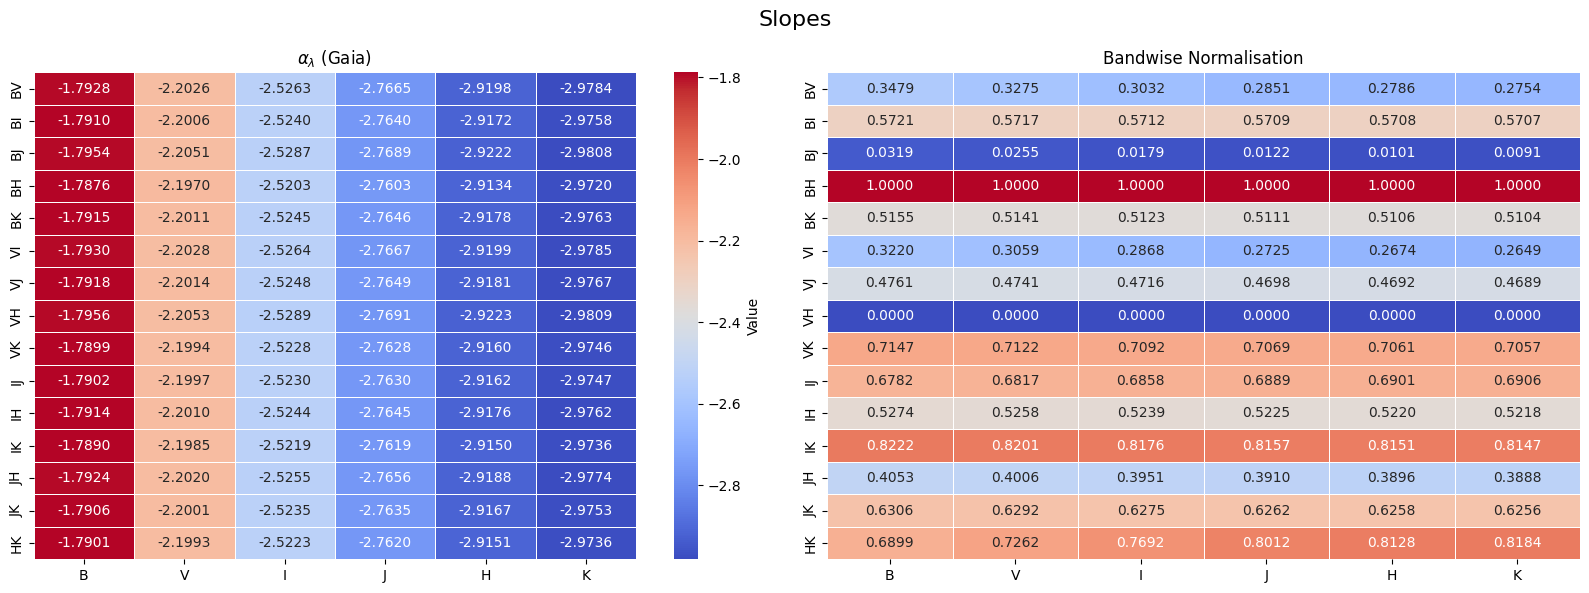

94_IRSB_plx ['_p'] _S
./docs/reports/plots/1_datacleaning/94_IRSB_plx_p_SIntercept.pdf


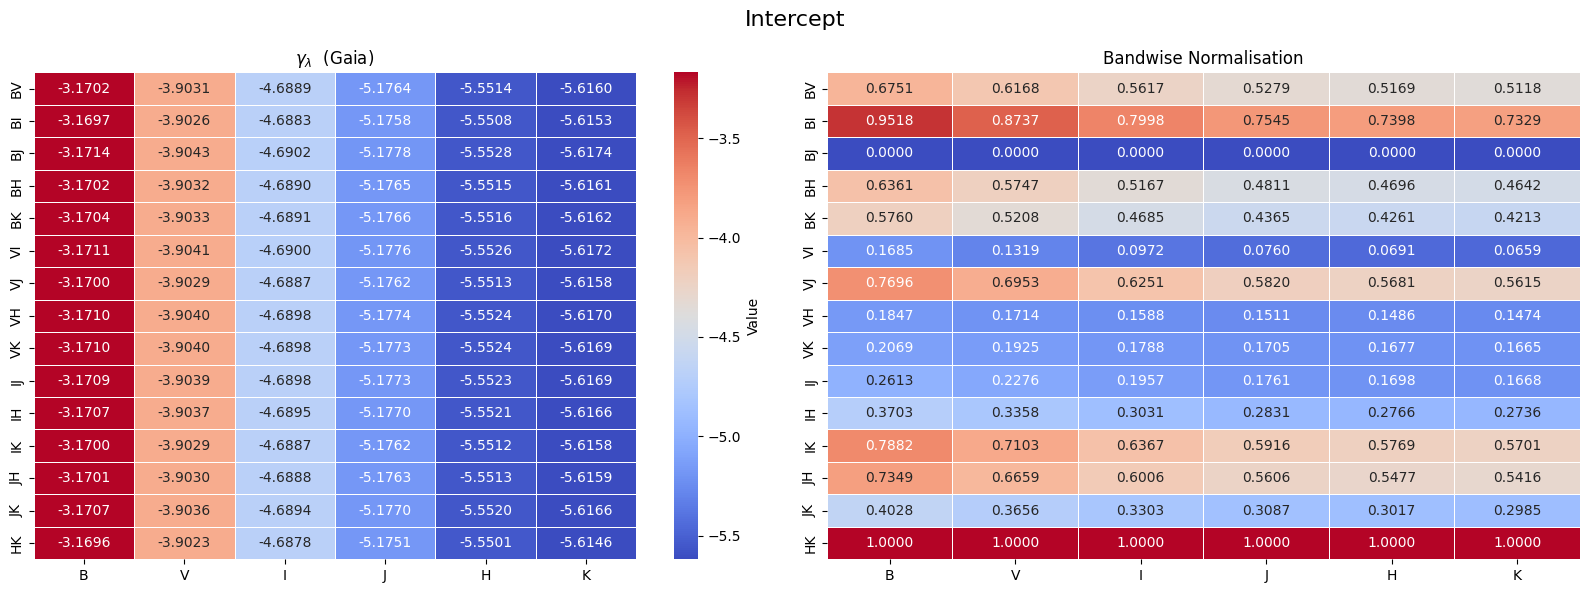

94_IRSB_plx ['_p'] _S
./docs/reports/plots/1_datacleaning/94_IRSB_plx_p_SScatter.pdf


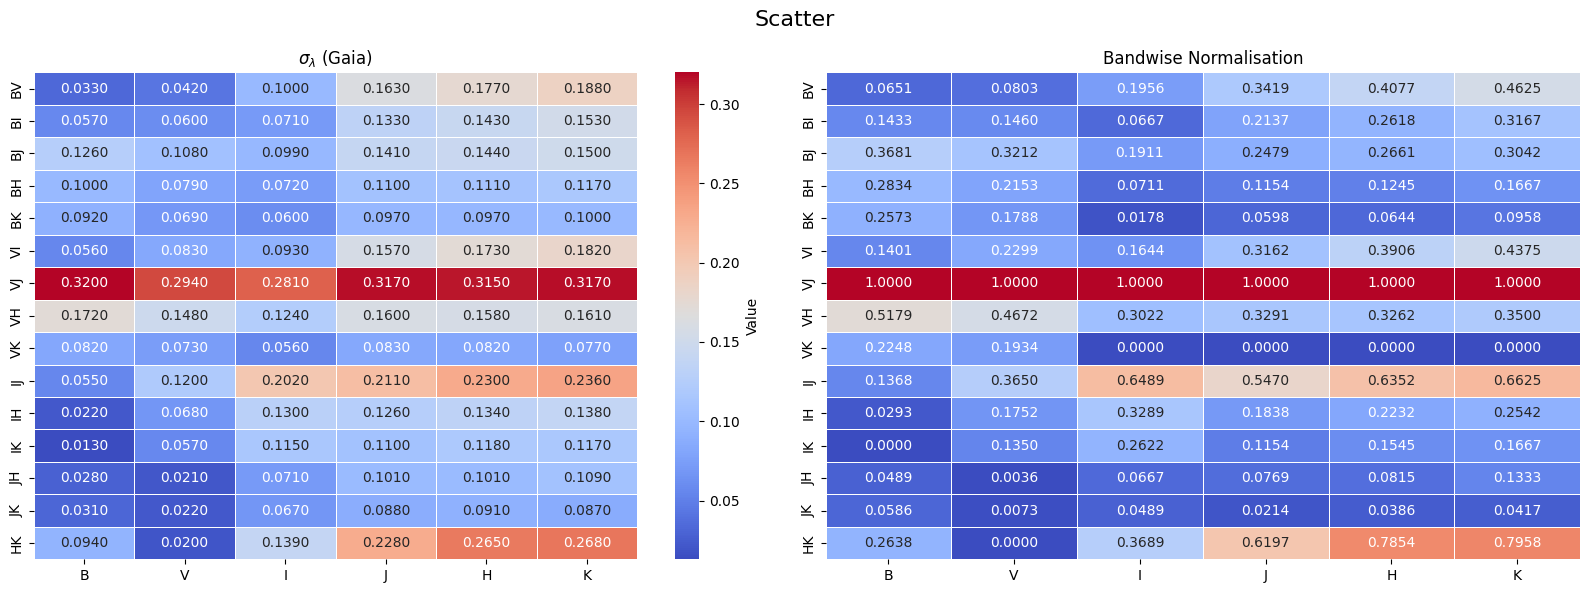

In [3]:
#heatmap_compare(es, title = 'PW slopes error')
heatmap_compare(s, title = 'Slopes', left='$\\alpha_\\lambda$ (Gaia)', right= 'Bandwise Normalisation', s=1 )
#heatmap_compare(ei, title = 'PW intercept error')
heatmap_compare(i, title = 'Intercept', left='$\\gamma_\\lambda$  (Gaia)', right= 'Bandwise Normalisation', s=1 )
heatmap_compare(sd, title = 'Scatter', left='$\\sigma_\\lambda$ (Gaia)', right= 'Bandwise Normalisation', s=1 )

99_IRSB_plx ['_j'] _S
./docs/reports/plots/1_datacleaning/99_IRSB_plx_j_SSlopes.pdf


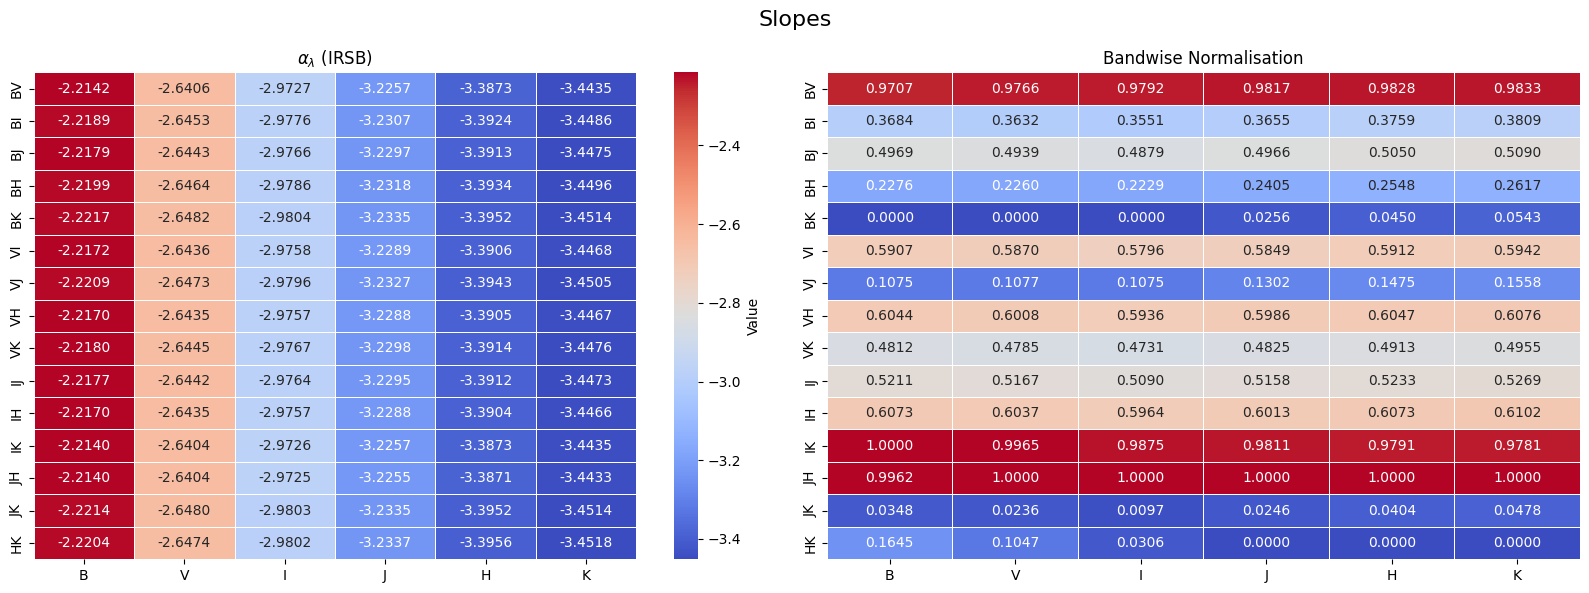

99_IRSB_plx ['_j'] _S
./docs/reports/plots/1_datacleaning/99_IRSB_plx_j_SIntercept.pdf


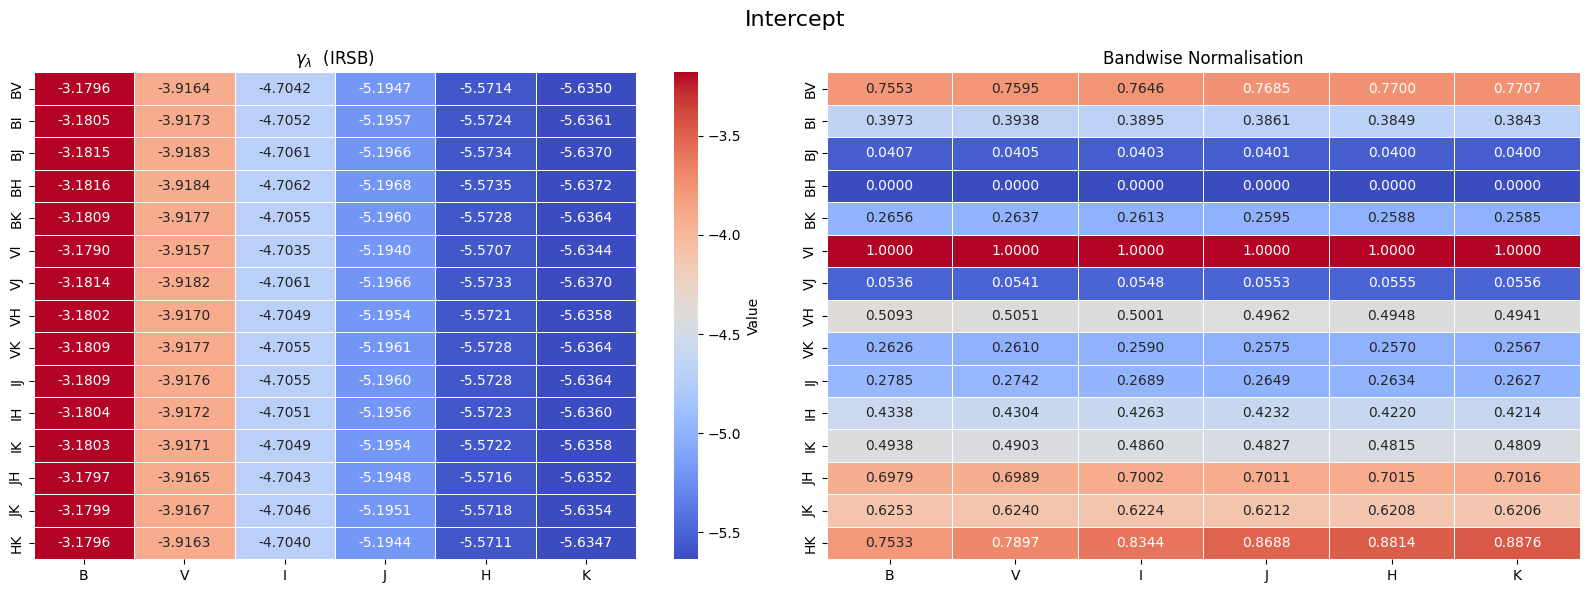

99_IRSB_plx ['_j'] _S
./docs/reports/plots/1_datacleaning/99_IRSB_plx_j_SScatter.pdf


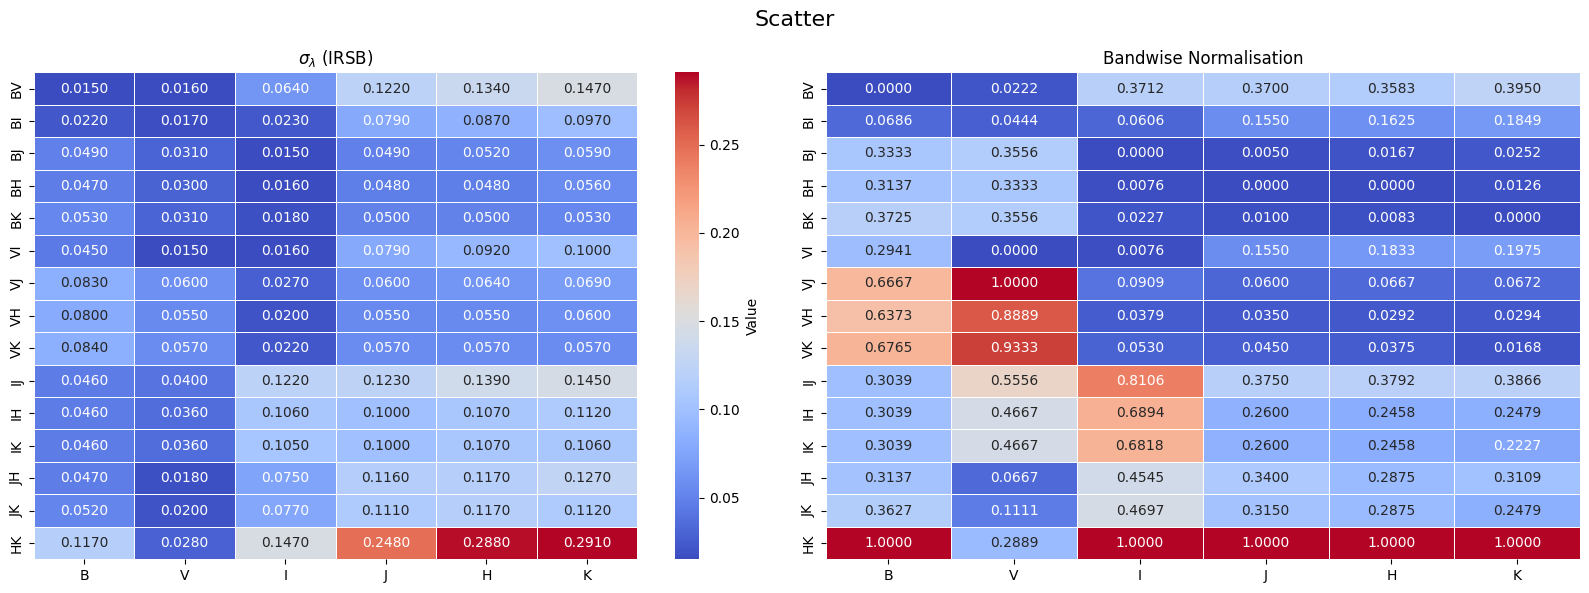

In [2]:
#heatmap_compare(es, title = 'PW slopes error')
heatmap_compare(s, title = 'Slopes', left='$\\alpha_\\lambda$ (IRSB)', right= 'Bandwise Normalisation', s=1 )
#heatmap_compare(ei, title = 'PW intercept error')
heatmap_compare(i, title = 'Intercept', left='$\\gamma_\\lambda$  (IRSB)', right= 'Bandwise Normalisation', s=1 )
heatmap_compare(sd, title = 'Scatter', left='$\\sigma_\\lambda$ (IRSB)', right= 'Bandwise Normalisation', s=1 )

94_IRSB_plx ['_j'] _S
./docs/reports/plots/1_datacleaning/94_IRSB_plx_j_SScatter.pdf


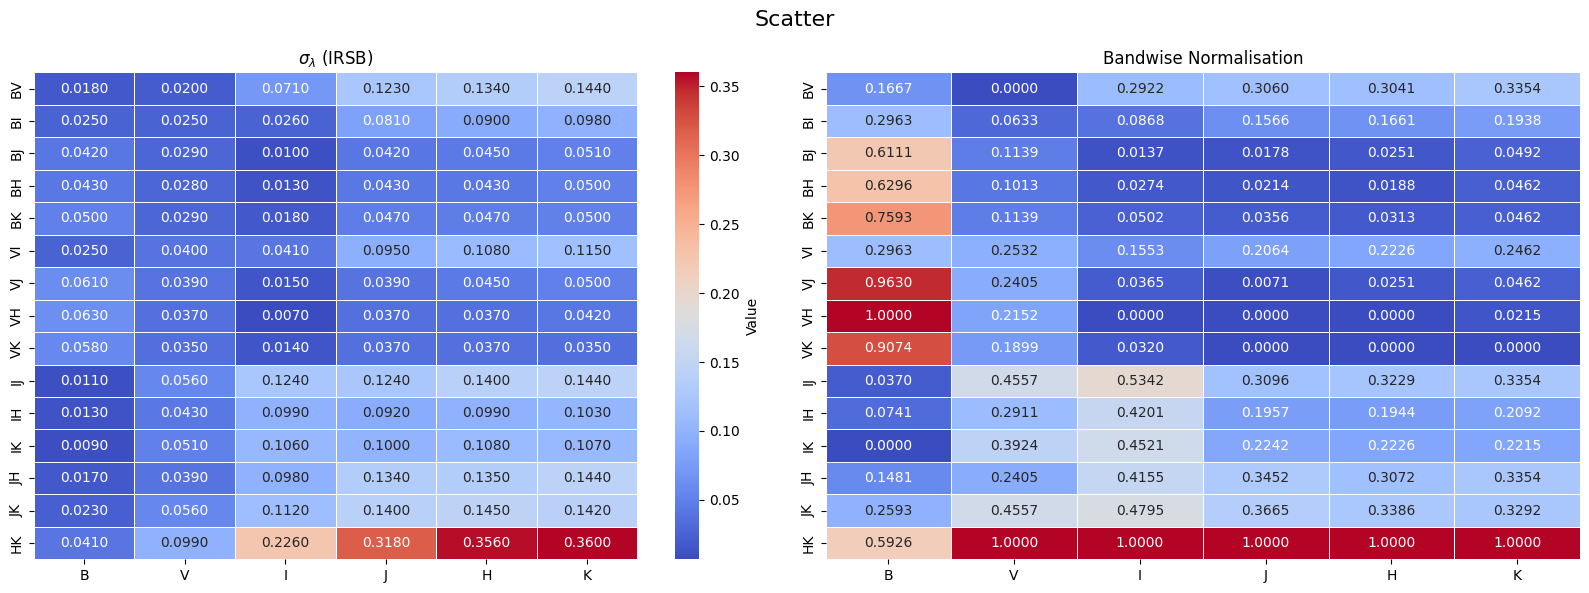

In [3]:
#heatmap_compare(es, title = 'PW slopes error')
#heatmap_compare(s, title = 'Slopes', left='$\\alpha_\\lambda$ (IRSB)', right= 'Bandwise Normalisation', s=1 )
#heatmap_compare(ei, title = 'PW intercept error')
#heatmap_compare(i, title = 'Intercept', left='$\\gamma_\\lambda$  (IRSB)', right= 'Bandwise Normalisation', s=1 )
heatmap_compare(sd, title = 'Scatter', left='$\\sigma_\\lambda$ (IRSB)', right= 'Bandwise Normalisation', s=1 )

In [1]:
#heatmap_compare(es, title = 'PW slopes error')
heatmap_compare(s, title = 'PW slopes')
#heatmap_compare(ei, title = 'PW intercept error')
heatmap_compare(i, title = 'PW intercept')
heatmap_compare(sd, title = 'PW standard deviation')

NameError: name 'heatmap_compare' is not defined

In [ ]:
import pandas as pd
from data.datamapping import mag, col_lin, colors
files = {}
files['0'] = '59_madore_3.23'
files['1'] = '110_IRSB_plx_j_3.19_S'
files['2'] = '20_cluster_cruz_3.23'
files['3'] = '30_LMC_3.41'
files['4'] = '32_SMC_VIJK_2.74'
files['5'] = '103_raw_data_IRSB_3.23'
k=1
reg = pd.read_csv(f'data/processed/{files[str(k)]}/3_deldel/{files[str(k)][:2]}_del_slope_intercept.csv')
cols = colors(mag)
for col in cols:
    print(f"\t {col} & {reg[f'B0{col[0]}{col}'].iloc[0] : .3f} ({reg[f'B0{col[0]}{col}'].iloc[2] : .3f}) & {reg[f'V0{col[0]}{col}'].iloc[0] : .3f} ({reg[f'V0{col[0]}{col}'].iloc[2] : .3f}) & {reg[f'I0{col[0]}{col}'].iloc[0] : .3f} ({reg[f'I0{col[0]}{col}'].iloc[2] : .3f}) & {reg[f'J0{col[0]}{col}'].iloc[0] : .3f} ({reg[f'J0{col[0]}{col}'].iloc[2] : .3f}) & {reg[f'H0{col[0]}{col}'].iloc[0] : .3f} ({reg[f'H0{col[0]}{col}'].iloc[2] : .3f}) & {reg[f'K0{col[0]}{col}'].iloc[0] : .3f} ({reg[f'K0{col[0]}{col}'].iloc[2] : .3f}) \\\\")
    print('\t \\rowcolor{yellow!20}')
    print(f"\t    & {reg[f'B0B{col}'].iloc[0] : .3f} ({reg[f'B0B{col}'].iloc[2] : .3f}) & {reg[f'V0V{col}'].iloc[0] : .3f} ({reg[f'V0V{col}'].iloc[2] : .3f}) & {reg[f'I0I{col}'].iloc[0] : .3f} ({reg[f'I0I{col}'].iloc[2] : .3f}) & {reg[f'J0J{col}'].iloc[0] : .3f} ({reg[f'J0J{col}'].iloc[2] : .3f}) & {reg[f'H0H{col}'].iloc[0] : .3f} ({reg[f'H0H{col}'].iloc[2] : .3f}) & {reg[f'K0K{col}'].iloc[0] : .3f} ({reg[f'K0K{col}'].iloc[2] : .3f}) \\\\")
    print('\t \\hline')
    #print(f"\t{col} & {reg[f'B0B{col}'].iloc[0] : .3f} ({reg[f'B0B{col}'].iloc[2] : .3f})")

	 BV &  0.243 ( 0.084) &  0.398 ( 0.067) &  0.471 ( 0.056) &  0.479 ( 0.050) &  0.478 ( 0.045) &  0.471 ( 0.046) \\
	 \rowcolor{yellow!20}
	    &  0.243 ( 0.084) &  0.398 ( 0.067) &  0.653 ( 0.054) &  0.870 ( 0.035) &  0.929 ( 0.024) &  0.962 ( 0.017) \\
	 \hline
	 BI &  0.652 ( 0.092) &  0.758 ( 0.066) &  0.831 ( 0.045) &  0.798 ( 0.040) &  0.773 ( 0.035) &  0.765 ( 0.036) \\
	 \rowcolor{yellow!20}
	    &  0.652 ( 0.092) &  0.683 ( 0.068) &  0.832 ( 0.045) &  0.944 ( 0.025) &  0.968 ( 0.016) &  0.982 ( 0.011) \\
	 \hline
	 BJ &  0.881 ( 0.090) &  0.945 ( 0.060) &  0.975 ( 0.041) &  0.972 ( 0.021) &  0.938 ( 0.014) &  0.933 ( 0.016) \\
	 \rowcolor{yellow!20}
	    &  0.881 ( 0.090) &  0.835 ( 0.066) &  0.920 ( 0.041) &  0.972 ( 0.021) &  0.981 ( 0.014) &  0.990 ( 0.009) \\
	 \hline
	 BH &  0.917 ( 0.096) &  0.983 ( 0.065) &  1.015 ( 0.045) &  1.017 ( 0.025) &  0.988 ( 0.014) &  0.984 ( 0.014) \\
	 \rowcolor{yellow!20}
	    &  0.917 ( 0.096) &  0.859 ( 0.070) &  0.941 ( 0.043) &  0.983 (

In [40]:
from data.datamapping import *
cols = ['BK', 'BJ', 'VJ', 'HK']
r[[f'B{m}' for m in cols]+[f'J{m}' for m in cols]+[f'K{m}' for m in cols]].style

,BBK,BBJ,BVJ,BHK,JBK,JBJ,JVJ,JHK,KBK,KBJ,KVJ,KHK
0,-3.100385,-3.081887,-2.812952,-2.945085,-3.086578,-3.081887,-3.018346,-3.049691,-3.100385,-3.097722,-3.071552,-3.084539
1,-5.887297,-5.817508,-5.364901,-4.413215,-5.834876,-5.817508,-5.710499,-5.486214,-5.887297,-5.878121,-5.834238,-5.741207
2,0.003149,0.011275,0.025712,0.171023,0.008765,0.011275,0.009266,0.035491,0.003149,0.003104,0.003742,0.018305
3,0.000855,0.003062,0.006983,0.046445,0.002380,0.003062,0.002516,0.009639,0.000855,0.000843,0.001016,0.004971
4,0.007000,0.026000,0.059000,0.394000,0.020000,0.026000,0.021000,0.082000,0.007000,0.007000,0.009000,0.042000


In [3]:
#mag = ['B', 'V', 'I','J','H','K']
mag = ['V', 'I','J','K']

r = reg['3']
c = '0'
for m in mag:#
    sl = r[f'{m}{c}'].iloc[0]
    serr = r[f'{m}{c}'].iloc[2]
    intr = r[f'{m}{c}'].iloc[1]
    ierr = r[f'{m}{c}'].iloc[3]
    sig = r[f'{m}{c}'].iloc[4]
    #print(f'{m} & {sl:.2f} ({serr:.2f}) & {intr:.2f} ({ierr:.2f})\\\\')
    print(f'\[W_{m}^ (\sigma :{sig: .3f}) = ({sl:.3f} \pm {serr:.3f}) \, (\log P -1) \; + ({intr:.3f} \pm {ierr:.3f}) \] ')
#M_V^ {\mathrm{IRSB}} (\sigma : 0.036) = (-2.281  \pm 0.016) \, ( \log P - 1 ) \; (-3.911 \pm 0.004) 
#M_B^ {\mathrm{IRSB}} (\sigma : 0.046) = (-1.885 \pm 0.020) (\log P -1) + -3.102 \pm 0.005 ]\ 

\[W_V^ (\sigma : 0.202) = (-2.707 \pm 0.101) \, (\log P -1) \; + (14.296 \pm 0.041) \] 
\[W_I^ (\sigma : 0.150) = (-2.960 \pm 0.076) \, (\log P -1) \; + (13.605 \pm 0.030) \] 
\[W_J^ (\sigma : 0.111) = (-3.124 \pm 0.056) \, (\log P -1) \; + (13.216 \pm 0.022) \] 
\[W_K^ (\sigma : 0.086) = (-3.226 \pm 0.043) \, (\log P -1) \; + (12.783 \pm 0.017) \] 


In [4]:
r

,Unnamed: 0,V0,I0,J0,K0,VVI,IVI,JVI,KVI,VVJ,...,JIJ,KIJ,VIK,IIK,JIK,KIK,VJK,IJK,JJK,KJK
0,m_l,-2.706932,-2.960326,-3.124067,-3.225706,-3.430874,-3.430874,-3.341223,-3.334419,-3.303033,...,-3.264391,-3.295958,-3.237692,-3.305320,-3.283295,-3.305320,-3.384557,-3.400722,-3.327344,-3.327344
1,c_l,14.295834,13.604655,13.215506,12.783116,12.321155,12.321155,12.623185,12.486543,12.751930,...,12.882025,12.616114,12.652756,12.536654,12.722583,12.536654,11.413070,11.731128,12.350726,12.350726
2,err_m_l,0.101469,0.075529,0.055883,0.043304,0.085323,0.085323,0.048072,0.040524,0.043400,...,0.049794,0.040496,0.062075,0.038487,0.043801,0.038487,0.044366,0.047829,0.035745,0.035745
3,err_c_l,0.040531,0.030169,0.022322,0.017297,0.034082,0.034082,0.019202,0.016187,0.017336,...,0.019890,0.016176,0.024796,0.015373,0.017496,0.015373,0.017722,0.019105,0.014278,0.014278
4,stdd_l,0.202000,0.150000,0.111000,0.086000,0.169000,0.169000,0.095000,0.080000,0.086000,...,0.099000,0.080000,0.123000,0.076000,0.087000,0.076000,0.088000,0.095000,0.071000,0.071000


In [12]:
reg[[f'{m}0{m}{col}' for m in mag]]
#for i, m in enumerate(mag):
#    print(f"\t{m} &  {reg[m+col].iloc[0] : .3f} ($\pm${reg[m+col].iloc[2] : .3f}) & {reg[m+col].iloc[1] : .3f} ($\pm${reg[m+col].iloc[3] : .3f}) \\\\")

,B0BHK,V0VHK,I0IHK,J0JHK,H0HHK,K0KHK
0,4.012993e-01,5.104453e-01,7.192397e-01,9.137461e-01,9.655627e-01,9.773706e-01
1,-1.950313e-16,-5.638454e-16,-2.271485e-16,-5.805283e-16,2.815759e-16,-8.019632e-16
2,6.454443e-02,6.559318e-02,5.684106e-02,3.503537e-02,2.316720e-02,1.523004e-02
3,3.186029e-02,2.732393e-02,1.945144e-02,1.055896e-02,6.744882e-03,4.434356e-03


In [8]:
import pandas as pd
from data.datamapping import *
mag=['V', 'I', 'J', 'K']
files = {}
files['0'] = '59_madore_3.23'
files['1'] = '76_IRSB_IJ_HK_3.23'#'76_IRSB_IJ_HK_3.23'#'94_jesper_3.23'
files['2'] = '20_cluster_cruz_3.23'
files['3'] = '29_LMC_l_3.4'
files['4'] = '32_SMC_VIJK_s_2.53'
files['5'] = '103_raw_data_IRSB_3.23'
files['6'] = '109_IRSB_plx_JK_p_3.23'

#reg={}
#for k in range(6):
#    reg[str(k)] = pd.read_csv(f'./data/processed/{files[str(k)]}/2_PLPW/{files[str(k)][:2]}_5_regression.csv')

from lvtlaw.h_loadoutput import calibrated_result_
from data.datamapping import *
import pandas as pd
result, reg, res, pre = calibrated_result_()

#print(files[str(k)])
print(file_name)
c='VJ'
for i, m in enumerate(mag):
    sl = reg[f'{m}0{c}S'].iloc[0]
    serr = reg[f'{m}0{c}S'].iloc[2]
    intr = reg[f'{m}0{c}S'].iloc[1]
    ierr = reg[f'{m}0{c}S'].iloc[3]
    sig = reg[f'{m}0{c}S'].iloc[4]

#    print(f'\[M_{m}^{c} (\sigma :{sig: .3f}) = ({sl:.3f} \pm {serr:.3f}) \, (\log P -1) \; + ({intr:.3f} \pm {ierr:.3f}) \] ')
   # print(f'\[M_{m}^{c} = {sl:.3f} \, (\log P -1) \; {intr:.3f} \] ')
   # print(f'\[({sig: .3f})_\sigma (\pm {serr:.3f})_\\alpha \, (\pm {ierr:.3f})_\\beta \] ')
    #for c in ['VK']:
#    print(m)
#    for m in mag:
#        print(c,reg[f'{m}{c}'].iloc[4])
    #print(f"\t{m},{col} &  {reg[m+col].iloc[0] : .3f} ($\pm${reg[m+col].iloc[2] : .3f}) & {reg[m+col].iloc[1] : .3f} ($\pm${reg[m+col].iloc[3] : .3f}) \\\\")

29_LMC_IK
\[M_V^VJ = -2.703 \, (\log P -1) \; 14.294 \] 
\[( 0.061)_\sigma (\pm 0.031)_\alpha \, (\pm 0.012)_\beta \] 
\[M_I^VJ = -2.956 \, (\log P -1) \; 13.603 \] 
\[( 0.014)_\sigma (\pm 0.007)_\alpha \, (\pm 0.003)_\beta \] 
\[M_J^VJ = -3.120 \, (\log P -1) \; 13.214 \] 
\[( 0.070)_\sigma (\pm 0.035)_\alpha \, (\pm 0.014)_\beta \] 
\[M_K^VJ = -3.221 \, (\log P -1) \; 12.781 \] 
\[( 0.070)_\sigma (\pm 0.035)_\alpha \, (\pm 0.014)_\beta \] 


In [5]:
from lvtlaw.h_loadoutput import calibrated_result_
from data.datamapping import *
import pandas as pd
result, reg, res, pre = calibrated_result_()

def table(reg,c):
    print(file_name, c)
    for i, m in enumerate(mag):
        sl = reg[f'{m}0{c}S'].iloc[0]
        serr = reg[f'{m}0{c}S'].iloc[2]
        intr = reg[f'{m}0{c}S'].iloc[1]
        ierr = reg[f'{m}0{c}S'].iloc[3]
        sig = reg[f'{m}0{c}S'].iloc[4]
        print(f'{m} & $({sig:.3f})_\sigma$ &{sl:.3f} & ($\pm$ {serr:.3f}) &{intr:.3f} &($\pm$ {ierr:.3f})\\\\')
#B &  -1.855 ($\pm$ 0.110) & -3.221 ($\pm$ 0.033) \\

table(reg,c='IK')


* * a_utils module loaded!
* * datamapping module loaded!
110_IRSB_plx IK
B & $(0.034)_\sigma$ &-2.242 & ($\pm$ 0.013) &-3.208 &($\pm$ 0.003)\\
V & $(0.031)_\sigma$ &-2.668 & ($\pm$ 0.012) &-3.943 &($\pm$ 0.003)\\
I & $(0.084)_\sigma$ &-3.005 & ($\pm$ 0.032) &-4.731 &($\pm$ 0.008)\\
J & $(0.078)_\sigma$ &-3.250 & ($\pm$ 0.030) &-5.220 &($\pm$ 0.008)\\
H & $(0.087)_\sigma$ &-3.413 & ($\pm$ 0.033) &-5.597 &($\pm$ 0.009)\\
K & $(0.084)_\sigma$ &-3.469 & ($\pm$ 0.032) &-5.659 &($\pm$ 0.008)\\


In [43]:
for i, m in enumerate(mag):
    print(f"\t{m} &  {b[1][m+'0'].iloc[0] : .3f} ($\pm${b[1][m+'0'].iloc[2] : .3f}) & {b[1][m+'0'].iloc[1] : .3f} ($\pm${b[1][m+'0'].iloc[3] : .3f}) \\\\")

	B &  -1.855 ($\pm$ 0.110) & -3.221 ($\pm$ 0.033) \\
	V &  -2.259 ($\pm$ 0.098) & -3.951 ($\pm$ 0.029) \\
	I &  -2.563 ($\pm$ 0.093) & -4.735 ($\pm$ 0.028) \\
	J &  -2.784 ($\pm$ 0.088) & -5.218 ($\pm$ 0.026) \\
	H &  -2.917 ($\pm$ 0.084) & -5.598 ($\pm$ 0.025) \\
	K &  -2.971 ($\pm$ 0.084) & -5.653 ($\pm$ 0.025) \\


In [9]:
from data.datamapping import mag, col_lin
ab=0
col='VI'
f='S'
b[0][[f'{m}{ab}{col}{f}' for m in mag]].style

,B0VIS,V0VIS,I0VIS,J0VIS,H0VIS,K0VIS
0,-2.269185,-2.663342,-2.978232,-3.194594,-3.330394,-3.374300
1,-3.214709,-3.944908,-4.706862,-5.258384,-5.558797,-5.659213
2,0.042927,0.028905,0.030740,0.027190,0.022027,0.023236
3,0.012804,0.008621,0.009169,0.008110,0.006570,0.006930


In [15]:
riess = pd.read_csv('data/18_riess/18_true_abs_data.csv')
riess

,Unnamed: 0,name,logP,EBV,plx,M_B0_g,M_V0_g,M_I0_g,M_J0_g,M_H0_g,M_K0_g
0,0,CFCas,0.687994,0.553,12.252555,-2.254463,-2.910745,-3.647558,-4.073122,-4.443855,-4.499111
1,1,CSVel,0.771201,0.737,12.547220,-2.616688,-3.218730,-3.926570,-4.402329,-4.744093,-4.812501
2,2,CVMon,0.730685,0.722,10.978801,-2.437799,-3.005861,-3.780693,-4.255762,-4.609903,-4.680316
3,3,EVSct,0.490098,0.655,11.225259,-2.706761,-3.196909,-3.888575,-4.179029,-4.437192,-4.449022
4,4,GHLup,0.967448,0.347,10.222618,-2.846879,-3.706428,-4.540071,-5.057895,-5.465485,-5.542995
5,5,QZNor,0.578244,0.263,11.425521,-2.782353,-3.406011,-4.077011,-4.537572,-4.846279,-4.907611
6,6,RSOri,0.878917,0.352,11.001908,-3.115326,-3.724868,-4.440180,-4.844901,-5.189698,-5.220207
7,7,SNor,0.989194,0.179,9.728963,-3.111366,-3.878133,-4.653490,-5.168789,-5.558612,-5.635765
8,8,STTau,0.605768,0.368,10.141119,-2.632237,-3.110759,-3.725812,-4.136202,-4.458263,-4.494567
9,9,SVVul,1.652569,0.462,11.815498,-5.070358,-6.094758,-7.052792,-7.583238,-7.995597,-8.063077


In [2]:
# madore result
Band & Slope  & $\sigma $ (mag)  & Zero  & $\sigma$(mag)  & rms \\
B & −2.277 & 0.121 & −3.214 & 0.036 & 0.27 //
V& −2.670 & 0.095 & −3.944  & 0.028  & 0.21 //
R& −2.874 & 0.075 & −4.396  & 0.022 &  0.17 //
I& −2.983 & 0.064 & −4.706  & 0.019  & 0.14 //
J& −3.198 &  0.054 & −5.258 &  0.016 &  0.12 //
H& −3.333 & 0.055 & −5.558  & 0.017  & 0.12 //
K& −3.377 & 0.055 & −5.659  & 0.016 &  0.12 //
W, VI & −3.476 & 0.037 & −5.889 &  0.011  & 0.08 //
W, BI & −3.600 & 0.033 & −5.997 &  0.010  & 0.07  //

$$
\begin{array}{|cc|}
\hline
M_B & = -1.86(\log P - 1)(\pm 0.011)  -3.22(\pm 0.003)\\
M_V & = -2.26(\log P - 1)(\pm 0.003)  -3.95(\pm 0.001)\\
M_I & = -2.57(\log P - 1)(\pm 0.014)  -4.74(\pm 0.004)\\
M_J & = -2.79(\log P - 1)(\pm 0.011)  -5.22(\pm 0.003)\\
M_H & = -2.92(\log P - 1)(\pm 0.011)  -5.60(\pm 0.003)\\
M_K & = -2.97(\log P - 1)(\pm 0.011)  -5.65(\pm 0.003)\\
\hline
M_B & = -1.85(\log P - 1)(\pm 0.009)  -3.22(\pm 0.003)\\
M_V & = -2.26(\log P - 1)(\pm 0.010)  -3.95(\pm 0.003)\\
M_I & = -2.56(\log P - 1)(\pm 0.018)  -4.73(\pm 0.005)\\
M_J & = -2.78(\log P - 1)(\pm 0.010)  -5.22(\pm 0.003)\\
M_H & = -2.92(\log P - 1)(\pm 0.014)  -5.60(\pm 0.004)\\
M_K & = -2.97(\log P - 1)(\pm 0.014)  -5.65(\pm 0.004)\\
\hline
\end{array}
$$



$$
\begin{array}{|cc|}
\hline
M_B & = -1.86(\log P - 1)(\pm 0.011)  -3.22(\pm 0.003)\\
M_V & = -2.26(\log P - 1)(\pm 0.003)  -3.95(\pm 0.001)\\
M_I & = -2.57(\log P - 1)(\pm 0.014)  -4.74(\pm 0.004)\\
M_J & = -2.79(\log P - 1)(\pm 0.011)  -5.22(\pm 0.003)\\
M_H & = -2.92(\log P - 1)(\pm 0.011)  -5.60(\pm 0.003)\\
M_K & = -2.97(\log P - 1)(\pm 0.011)  -5.65(\pm 0.003)\\
\hline
M_B & = -1.85(\log P - 1)(\pm 0.009)  -3.22(\pm 0.003)\\
M_V & = -2.26(\log P - 1)(\pm 0.010)  -3.95(\pm 0.003)\\
M_I & = -2.56(\log P - 1)(\pm 0.018)  -4.73(\pm 0.005)\\
M_J & = -2.78(\log P - 1)(\pm 0.010)  -5.22(\pm 0.003)\\
M_H & = -2.92(\log P - 1)(\pm 0.014)  -5.60(\pm 0.004)\\
M_K & = -2.97(\log P - 1)(\pm 0.014)  -5.65(\pm 0.004)\\
\hline
\end{array}
$$
